# Proyecto del curso de Ciencia de datos en Python


### Realizado por Yurandir Santa Maria Santana Sandoval

### Instrucciones

El proyecto consiste en aplicar los conocimientos aprendidos en clase (y apoyandose de referencias adicionales utiles) para crear modelos predictivos de regresion lineal uni-variable sencillos de la forma:

__y = f(x) =  mx +b__

Donde:

y = la variable dependiente


x = variable independiente  


m = pendiente de la recta(parametro del modelo)  


b = intercepto(parametro del modelo)  

In [3]:
# En este paso se importan todas las librerías que van a ser de utilidad durante la elaboración del proyecto.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as Sci
import seaborn as sns

In [4]:
# Autorización de acceso de Google Colab a Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
"""
Carga del archivo que contiene los datos en formato binario de Numpy (.npy). 

Este archivo estaba guardado en el Google Drive asociado a mi cuenta, por lo que si alguien ajeno a mi desea compilar el código deberá modificar
la ruta de acceso. El archivo origial está disponible para descarga en el repositorio del proyecto en mi cuenta de Github.

"""

Database = np.load('/content/drive/MyDrive/proyecto_training_data.npy')



En este proyecto el 80% del dataset (rows) se usará para todo el proceso (análisis exploratorio, selección de variables a usar, crear modelos predictivos). A estos datos se les llamará "datos de entrenamiento"

El 20% restante del dataset (rows) se usará para probar ,validar y evaluar los modelos resultantes. A estos datos se les llamará “datos de validación y pruebas”

Este proyecto está basado en **La predicción de precios de casas** que suele ser utilizado como método de enseñanza de Python, por lo que las variables pueden ser definidas de las siguiente manera:

**y** = El precio de venta real de cierta casa.

**x** = Cierta característica de cierta casa.

**yhat** = f(x) = Precio estimado o predicción del precio de venta para una casa con cierta característica x.

**m** = pendiente de la recta que usamos para aproximar el precio de la casa yhat.

**b** = intercepto de la recta que usamos para aproximar el precio de la casa yhat.




### Slicing


* Entrenamiento - 80%.

* Validación y Pruebas - 20%.


**Atributos de database:**

* SalePrice
* overallQual
* 1stFlrSF
* TotRmsAbvGrd
* YearBuilt
* LotFrontage


In [6]:
lenght = len(Database)
Trainlenght = int(lenght*0.8)

train = np.nan_to_num(Database[:Trainlenght])
test = Database[Trainlenght:]
attribute_names = ['SalesPrice','OverallQual','FstFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']

Table1 = pd.DataFrame(train,columns=attribute_names)

print(Table1)

      SalesPrice  OverallQual  FstFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0       208500.0          7.0     856.0           8.0     2003.0         65.0
1       181500.0          6.0    1262.0           6.0     1976.0         80.0
2       223500.0          7.0     920.0           6.0     2001.0         68.0
3       140000.0          7.0     961.0           7.0     1915.0         60.0
4       250000.0          8.0    1145.0           9.0     2000.0         84.0
...          ...          ...       ...           ...        ...          ...
1163    108959.0          4.0    1258.0           6.0     1969.0         60.0
1164    194000.0          5.0    1432.0           5.0     1978.0          0.0
1165    233170.0          7.0    1502.0           7.0     2009.0         79.0
1166    245350.0          8.0    1694.0           7.0     2008.0         64.0
1167    173000.0          6.0     959.0           7.0     2000.0         58.0

[1168 rows x 6 columns]


### Estadística Descriptiva

#### Sales Price

El precio de venta de la propiedad en dólares.

In [7]:
# SALES PRICE - Media, valor máximo, valor mínimo, Rango y desviación estándar.

print("\nMedia de Sales Price")
mSalesPrice = round(Table1['SalesPrice'].mean(),2)
print(mSalesPrice)

print("\nValor Máximo de Sales Price")
MaxSalesPrice = round(Table1['SalesPrice'].max(),2)
print(MaxSalesPrice)

print("\nValor Mínimo de Sales Price")
MinSalesPrice = round(Table1['SalesPrice'].min(),2)
print(MinSalesPrice)

print("\nRango de Sales Price")
RangoSalesPrice = round(MaxSalesPrice - MinSalesPrice,2)
print(RangoSalesPrice)

print("\nDesviación Estándar de Sales Price")
StdSalesPrice = round(Table1['SalesPrice'].std(),2)
print(StdSalesPrice)


Media de Sales Price
180590.28

Valor Máximo de Sales Price
755000.0

Valor Mínimo de Sales Price
34900.0

Rango de Sales Price
720100.0

Desviación Estándar de Sales Price
78815.7


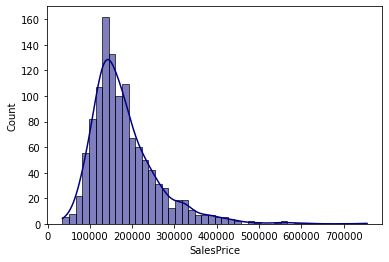

In [8]:
sns.histplot(data = Table1 , x = 'SalesPrice', color = 'navy', kde = True)

#### Overral Qual

Calidad general del material y acabado, califica el material general y el acabado de la casa. La califación se define con uno de los números de la siguiente lista que mejor identifiquen a la casa con base en el resultado:


1. Very Poor
2. Poor
3. Fair
4. Below Average
5. Average
6. Above Average
7. Good
8. Very good
9. Excellent
10. Very Excellent



In [9]:
# Overral Qual - Media, valor máximo, valor mínimo, Rango y desviación estándar.

print("\nMedia de Overral Qual")
mOverallQual = round(Table1['OverallQual'].mean(),2)
print(mOverallQual)

print("\nValor Máximo de Overral Qual")
MaxOverallQual = round(Table1['OverallQual'].max(),2)
print(MaxOverallQual)

print("\nValor Mínimo de Overral Qual")
MinOverallQual = round(Table1['OverallQual'].min(),2)
print(MinOverallQual)

print("\nRango de Overral Qual")
RangoOverallQual = round(MaxOverallQual - MinOverallQual,2)
print(RangoOverallQual)

print("\nDesviación Estándar de Overral Qual")
StdOverallQual = round(Table1['OverallQual'].std(),2)
print(StdOverallQual)


Media de Overral Qual
6.1

Valor Máximo de Overral Qual
10.0

Valor Mínimo de Overral Qual
1.0

Rango de Overral Qual
9.0

Desviación Estándar de Overral Qual
1.38


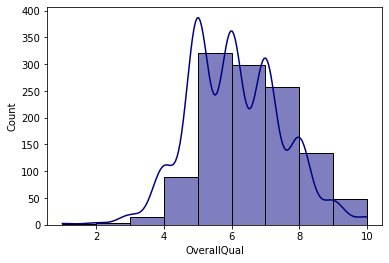

In [10]:
sns.histplot(data = Table1 , x = 'OverallQual', color = 'navy', kde = True , binwidth = 1)

#### 1stFlrSF - First Floor square feet

Área del primer piso en pies cuadrados.

In [11]:
# 1stFlrSF - Media, valor máximo, valor mínimo, Rango y desviación estándar.

print("\nMedia de FstFlrSF")
mFstFlrSF = round(Table1['FstFlrSF'].mean(),2)
print(mFstFlrSF)

print("\nValor Máximo de FstFlrSF")
MaxFstFlrSF = round(Table1['FstFlrSF'].max(),2)
print(MaxFstFlrSF)

print("\nValor Mínimo de FstFlrSF")
MinFstFlrSF = round(Table1['FstFlrSF'].min(),2)
print(MinFstFlrSF)

print("\nRango de FstFlrSF")
RangoFstFlrSF = round(MaxFstFlrSF - MinFstFlrSF,2)
print(RangoFstFlrSF)

print("\nDesviación Estándar de FstFlrSF")
StdFstFlrSF = round(Table1['FstFlrSF'].std(),2)
print(StdFstFlrSF)


Media de FstFlrSF
1156.32

Valor Máximo de FstFlrSF
3228.0

Valor Mínimo de FstFlrSF
334.0

Rango de FstFlrSF
2894.0

Desviación Estándar de FstFlrSF
373.78


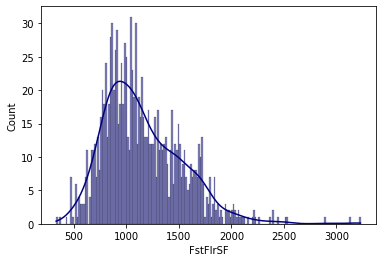

In [12]:
sns.histplot(data = Table1 , x = 'FstFlrSF', color = 'navy', kde = True , binwidth = 15)

#### TotRmsAbvGrd

Total de habitaciones por encima de grado exceptuando baños.

In [13]:
# TotRmsAbvGrd - Media, valor máximo, valor mínimo, Rango y desviación estándar.

print("\nMedia de TotRmsAbvGrd")
mTotRmsAbvGrd = round(Table1['TotRmsAbvGrd'].mean(),2)
print(mTotRmsAbvGrd)

print("\nValor Máximo de TotRmsAbvGrd")
MaxTotRmsAbvGrd = round(Table1['TotRmsAbvGrd'].max(),2)
print(MaxTotRmsAbvGrd)

print("\nValor Mínimo de TotRmsAbvGrd")
MinTotRmsAbvGrd = round(Table1['TotRmsAbvGrd'].min(),2)
print(MinTotRmsAbvGrd)

print("\nRango de FstFlrSF")
RangoTotRmsAbvGrd = round(MaxTotRmsAbvGrd - MinTotRmsAbvGrd,2)
print(RangoTotRmsAbvGrd)

print("\nDesviación Estándar de TotRmsAbvGrd")
StdTotRmsAbvGrd = round(Table1['TotRmsAbvGrd'].std(),2)
print(StdTotRmsAbvGrd)


Media de TotRmsAbvGrd
6.49

Valor Máximo de TotRmsAbvGrd
14.0

Valor Mínimo de TotRmsAbvGrd
2.0

Rango de FstFlrSF
12.0

Desviación Estándar de TotRmsAbvGrd
1.61


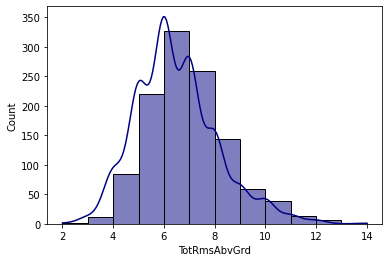

In [14]:
sns.histplot(data = Table1 , x = 'TotRmsAbvGrd', color = 'navy', kde = True , binwidth = 1)

#### YearBuilt

Fecha original de construcción.

In [15]:
# YearBuilt - Media, valor máximo, valor mínimo, Rango y desviación estándar.

print("\nMedia de YearBuilt")
mYearBuilt = round(Table1['YearBuilt'].mean(),2)
print(mYearBuilt)

print("\nValor Máximo de YearBuilt")
MaxYearBuilt = round(Table1['YearBuilt'].max(),2)
print(MaxYearBuilt)

print("\nValor Mínimo de YearBuilt")
MinYearBuilt = round(Table1['YearBuilt'].min(),2)
print(MinYearBuilt)

print("\nRango de YearBuilt")
RangoYearBuilt = round(MaxYearBuilt - MinYearBuilt,2)
print(RangoYearBuilt)

print("\nDesviación Estándar de YearBuilt")
StdYearBuilt = round(Table1['YearBuilt'].std(),2)
print(StdYearBuilt)


Media de YearBuilt
1971.45

Valor Máximo de YearBuilt
2010.0

Valor Mínimo de YearBuilt
1875.0

Rango de YearBuilt
135.0

Desviación Estándar de YearBuilt
29.95


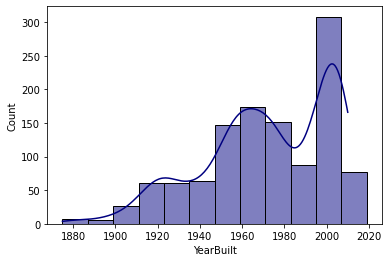

In [16]:
sns.histplot(data = Table1 , x = 'YearBuilt', color = 'navy', kde = True , binwidth = 12)

#### LotFrontage

Pies lineales de calle conectados a la propiedad.

In [17]:
# LotFrontage - Media, valor máximo, valor mínimo, Rango y desviación estándar.

print("\nMedia de LotFrontage")
mLotFrontage = round(Table1['LotFrontage'].mean(),2)
print(mLotFrontage)

print("\nValor Máximo de LotFrontage")
MaxLotFrontage = round(Table1['LotFrontage'].max(),2)
print(MaxLotFrontage)

print("\nValor Mínimo de LotFrontage")
MinLotFrontage = round(Table1['LotFrontage'].min(),2)
print(MinLotFrontage)

print("\nRango de LotFrontage")
RangoLotFrontage = round(MaxLotFrontage - MinLotFrontage,2)
print(RangoLotFrontage)

print("\nDesviación Estándar de LotFrontage")
StdLotFrontage = round(Table1['LotFrontage'].std(),2)
print(StdLotFrontage)


Media de LotFrontage
57.61

Valor Máximo de LotFrontage
313.0

Valor Mínimo de LotFrontage
0.0

Rango de LotFrontage
313.0

Desviación Estándar de LotFrontage
34.14


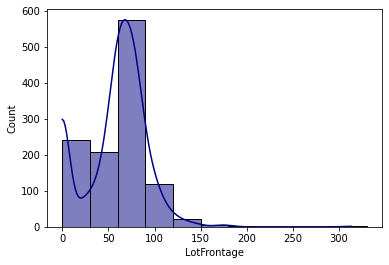

In [18]:
sns.histplot(data = Table1 , x = 'LotFrontage', color = 'navy', kde = True , binwidth = 30)